In [1]:
from google.colab import files
files.upload()  # Select and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezaakhavansafaei","key":"7a1024303e3fdd5f892634f1f6326f03"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d wolfram77/graphs-snap-higgs-twitter -p /content


 94% 113M/120M [00:01<00:00, 82.1MB/s] 
100% 120M/120M [00:01<00:00, 69.8MB/s]


In [4]:
import zipfile

with zipfile.ZipFile('/content/graphs-snap-higgs-twitter.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [5]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/higgs-social_network.edgelist'

# Define column names
columns = ['id1', 'id2']

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display the DataFrame
df.head()

,id1,id2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [6]:
df.count

<bound method DataFrame.count of              id1     id2
0              1       2
1              1       3
2              1       4
3              1       5
4              1       6
...          ...     ...
14855837  456624       1
14855838  456625     220
14855839  421799   81585
14855840  421799  100470
14855841  456626       1

[14855842 rows x 2 columns]>

In [7]:
import pandas as pd
import networkx as nx
# Create an empty directed graph using NetworkX
G = nx.DiGraph()

# Add edges from the DataFrame to the graph
G.add_edges_from(df.values)


In [8]:
import matplotlib.pyplot as plt
# Visualize the graph
#pos = nx.spring_layout(G, seed=1000)  # Positions of nodes using spring layout algorithm

#plt.figure(figsize=(10, 8))
#nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=8, font_weight='bold', arrowsize=10)
#plt.title("NetworkX Graph Visualization", fontsize=12)
#plt.show()

In [9]:
# Find the connected components in the graph
components = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
components



[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [10]:
i=0
for component in components:
  print(len(component))
  i=i+1
  if len(component)<5:
    break


360210
17
10
9
9
8
8
8
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4


In [11]:
# Select the number of largest components you want to include in the smaller graph
num_largest_components = 67

# Create a new graph containing only the nodes and edges from the largest components
new_graph = G.subgraph(set.union(*[component for component in components[1:13]]))
#new_graph = G.subgraph(set.union(*[component for component in components[:num_largest_components] if len(component) < 100]))


In [12]:
len(G.nodes())

456626

In [13]:
len(G.edges())

14855842

In [14]:
len(new_graph.nodes())

104

In [15]:
len(new_graph.edges())

520

In [16]:
len(new_graph.nodes())

104

In [17]:
new_graph1 = G.subgraph(set.union(*[component for component in components[0:1]]))


In [18]:
updated_sample_graph = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
updated_sample_graph.add_nodes_from(new_graph1.nodes())
updated_sample_graph.add_edges_from(new_graph1.edges())


In [19]:
len(updated_sample_graph.nodes())

360210

In [20]:
len(updated_sample_graph.edges())

14102605

In [21]:
import random

# Assuming you already have 'updated_sample_graph' as the graph you want to modify.
largest_cmp=updated_sample_graph
# Calculate the number of nodes to keep (10% of the total nodes)
num_nodes_to_keep = int(len(updated_sample_graph) * 0.1)

# Get the list of all nodes in the graph
all_nodes = list(updated_sample_graph.nodes())

# Randomly select nodes to remove (90% of the nodes)
nodes_to_remove = random.sample(all_nodes, len(all_nodes) - num_nodes_to_keep)

# Remove the selected nodes and their associated edges from the graph
updated_sample_graph.remove_nodes_from(nodes_to_remove)



In [22]:
len(updated_sample_graph.nodes())

36021

In [23]:
len(updated_sample_graph.edges())

132857

In [24]:
# Find the connected components in the graph
Components = sorted(nx.strongly_connected_components(largest_cmp), key=len, reverse=True)


In [25]:
i=0
for component in Components:
  print(len(component))
  i=i+1
  if len(component)<5:
    break
print(i)

14350
17
14
10
8
7
7
7
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
4
26


In [26]:
new_graph0 = G.subgraph(set.union(*[component for component in Components[1:8]]))


In [27]:
len(new_graph0.nodes())

70

In [28]:
new_graph11 = G.subgraph(set.union(*[component for component in Components[0:1]]))


In [29]:
updated_sample_graph1 = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
updated_sample_graph1.add_nodes_from(new_graph11.nodes())
updated_sample_graph1.add_edges_from(new_graph11.edges())


In [30]:
len(updated_sample_graph1.nodes())

14350

In [31]:
import random

# Assuming you already have 'updated_sample_graph' as the graph you want to modify.
largest_cmp1=updated_sample_graph1
# Calculate the number of nodes to keep (10% of the total nodes)
num_nodes_to_keep = int(len(updated_sample_graph1) * 0.1)

# Get the list of all nodes in the graph
all_nodes = list(updated_sample_graph1.nodes())

# Randomly select nodes to remove (90% of the nodes)
nodes_to_remove = random.sample(all_nodes, len(all_nodes) - num_nodes_to_keep)

# Remove the selected nodes and their associated edges from the graph
updated_sample_graph1.remove_nodes_from(nodes_to_remove)



In [32]:
# Find the connected components in the graph
Comps = sorted(nx.strongly_connected_components(updated_sample_graph1), key=len, reverse=True)

In [33]:
i=0
for component in Comps:
  print(len(component))
  i=i+1
  if len(component)<5:
    break
print(i)

21
11
10
10
9
9
7
6
6
5
5
5
5
5
4
15


In [35]:
# Select the number of largest components you want to include in the smaller graph


# Create a new graph containing only the nodes and edges from the largest components
new_graph2 = G.subgraph(set.union(*[component for component in Comps[:8]]))


In [36]:
len(new_graph2.nodes())

83

In [37]:
import networkx as nx

# Assuming you have already defined G, Comps, Components, and components

# Create an empty directed graph
merged_graph = nx.DiGraph()

# Add nodes and edges from each subgraph to the merged graph
for component in Comps[:12]:
    merged_graph.add_edges_from(G.subgraph(component).edges())

for component in Components[1:19]:
    merged_graph.add_edges_from(G.subgraph(component).edges())

for component in components[1:67]:
    merged_graph.add_edges_from(G.subgraph(component).edges())

# Now, merged_graph contains all the nodes and edges from the four subgraphs.


In [38]:
len(merged_graph.nodes())

623

In [39]:
len(merged_graph.edges())

1708

In [49]:
import networkx as nx
import random

# Assuming you have already defined merged_graph and G

# Step 1: Get nodes from the merged_graph
merged_nodes = set(merged_graph.nodes())

# Step 4: Combine nodes from merged_graph and random_nodes_to_keep
nodes_to_keep = merged_nodes

# Step 5: Create a new graph with the selected nodes and the corresponding edges
new_graph = G.subgraph(nodes_to_keep)


In [50]:
g = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
g.add_nodes_from(new_graph.nodes())
g.add_edges_from(new_graph.edges())

In [51]:
isolated_nodes = [node for node in g if g.out_degree(node) == 0 and g.in_degree(node) == 0]


In [52]:
len(isolated_nodes)

0

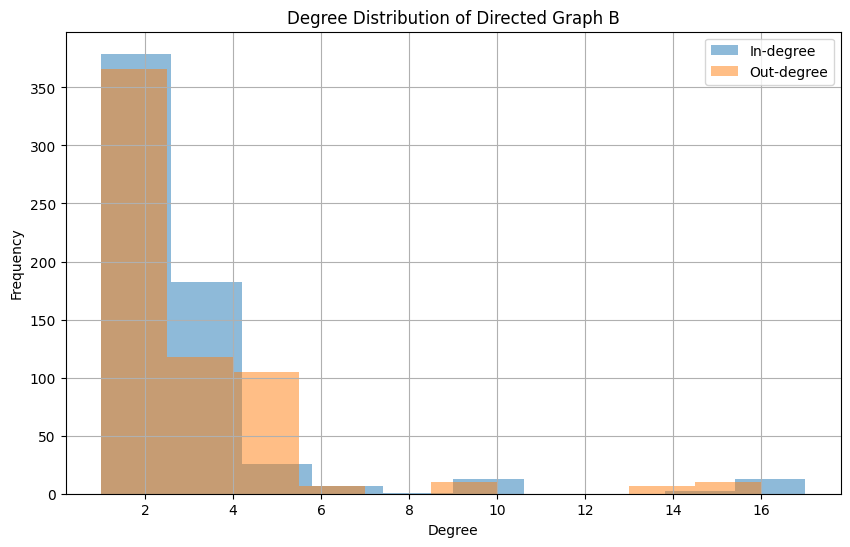

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(g.in_degree())
out_degrees = dict(g.out_degree())

# Create a list of in-degrees and out-degrees
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=10, alpha=0.5, label='In-degree')
plt.hist(out_degree_values, bins=10, alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Directed Graph B')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(g.in_degree())
out_degrees = dict(g.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(g.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Display the DataFrame
degree_df

,Node,In-degree,Out-degree
0,262145,1,1
1,389124,1,1
2,342025,3,3
3,428042,1,1
4,428043,1,1
...,...,...,...
618,384996,2,1
619,384997,2,2
620,384998,1,1
621,10233,16,13


In [56]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Create a list to store the edges
edges_list = []

# Iterate through the edges and add them to the list
for edge in g.edges():
    edges_list.append({'ID1': edge[0], 'ID2': edge[1]})

# Create a DataFrame from the list of edges
edges_df = pd.DataFrame(edges_list)

# Save the DataFrame to a CSV file
edges_df.to_csv('test_graph.csv', index=False)
edges_df.head()

,ID1,ID2
0,262145,75490
1,389124,387816
2,342025,336233
3,342025,113903
4,342025,139773


In [72]:
Comps = sorted(nx.strongly_connected_components(updated_sample_graph1), key=len, reverse=True)
print(Comps)

[{5381, 13964, 43149, 40592, 7057, 4635, 121630, 6835, 27828, 31924, 439, 78395, 3650, 49100, 3662, 70482, 127972, 5732, 29800, 91246, 5489}, {80803, 218436, 272474, 23976, 142573, 52178, 142579, 270006, 40410, 42908, 128221}, {262145, 75490, 157505, 245985, 96554, 122219, 128942, 77999, 227898, 146941}, {69481, 190601, 85129, 25647, 53713, 187379, 271093, 141045, 271096, 53787}, {40834, 20067, 5798, 21803, 42802, 6162, 44083, 5175, 20023}, {6629, 141959, 12839, 12813, 27506, 14390, 19191, 64056, 52092}, {249377, 95012, 21093, 157712, 44048, 118451, 61877}, {15591, 44392, 88617, 93774, 8559, 44378}, {22432, 73572, 185735, 166215, 18712, 130654}, {54181, 39111, 86511, 33277, 33278}, {18826, 42955, 92206, 132626, 15380}, {19746, 244710, 279687, 112820, 67100}, {177801, 199114, 194422, 179546, 143198}, {20929, 63171, 151303, 123600, 23324}, {1080, 764, 43221, 11556}, {57144, 14583, 99156, 40327}, {60872, 163393, 155500, 42934}, {132659, 6971, 331493}, {22378, 22461, 164078}, {15907, 718, 

In [77]:
i=0
j=0
for component in Comps:
  print(len(component))
  i=i+1
  j=j+len(component)

print(i)
print(j)

21
11
10
10
9
9
7
6
6
5
5
5
5
5
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [76]:
print(len(g.nodes))

623


In [40]:
import networkx as nx
import random

# Assuming you have already defined merged_graph and G

# Step 1: Get nodes from the merged_graph
merged_nodes = set(merged_graph.nodes())

# Step 2: Get nodes not in the merged_graph
all_nodes = set(G.nodes())
nodes_not_in_merged = all_nodes - merged_nodes

# Step 3: Randomly sample 0.01 of nodes_not_in_merged
num_nodes_to_keep = int(len(G.nodes()) * 0.1)
random_nodes_to_keep = random.sample(nodes_not_in_merged, num_nodes_to_keep)

# Step 4: Combine nodes from merged_graph and random_nodes_to_keep
nodes_to_keep = merged_nodes.union(random_nodes_to_keep)

# Step 5: Create a new graph with the selected nodes and the corresponding edges
new_graph = G.subgraph(nodes_to_keep)


<ipython-input-40-af3e6734a52b>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes_to_keep = random.sample(nodes_not_in_merged, num_nodes_to_keep)


In [41]:
len(new_graph.nodes())

46285

In [42]:
len(new_graph.edges())

160744

In [43]:
g = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
g.add_nodes_from(new_graph.nodes())
g.add_edges_from(new_graph.edges())


In [44]:
isolated_nodes = [node for node in g if g.out_degree(node) == 0 and g.in_degree(node) == 0]


In [45]:
len(isolated_nodes)

12260

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already defined g using the provided code

# Remove nodes with no edges
isolated_nodes = [node for node in g if g.out_degree(node) == 0 and g.in_degree(node) == 0]
g.remove_nodes_from(isolated_nodes)



In [69]:
len(g.nodes())

623

In [70]:
len(g.edges())

1720

In [ ]:
import networkx as nx
import random

# Assuming you have already defined merged_graph and G

# Step 1: Get nodes from the merged_graph
g_nodes = set(g.nodes())

# Step 2: Get nodes not in the merged_graph
all_nodes = set(G.nodes())
nodes_not_in_g = all_nodes - g_nodes

# Step 3: Randomly sample 0.01 of nodes_not_in_merged
num_nodes_to_keep = int(len(G.nodes()) * 0.003)
random_nodes_to_keep = random.sample(nodes_not_in_g, num_nodes_to_keep)

# Step 4: Combine nodes from merged_graph and random_nodes_to_keep
nodes_to_keep = g_nodes.union(random_nodes_to_keep)

# Step 5: Create a new graph with the selected nodes and the corresponding edges
New_graph = G.subgraph(nodes_to_keep)


<ipython-input-83-38031cdc7899>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes_to_keep = random.sample(nodes_not_in_g, num_nodes_to_keep)


In [ ]:
len(New_graph.nodes())

35744

In [ ]:
len(New_graph.edges())

167314

In [ ]:
B = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
B.add_nodes_from(New_graph.nodes())
B.add_edges_from(New_graph.edges())


In [ ]:
isolated_nodes = [node for node in B if B.out_degree(node) == 0 and B.in_degree(node) == 0]
len(isolated_nodes)

416

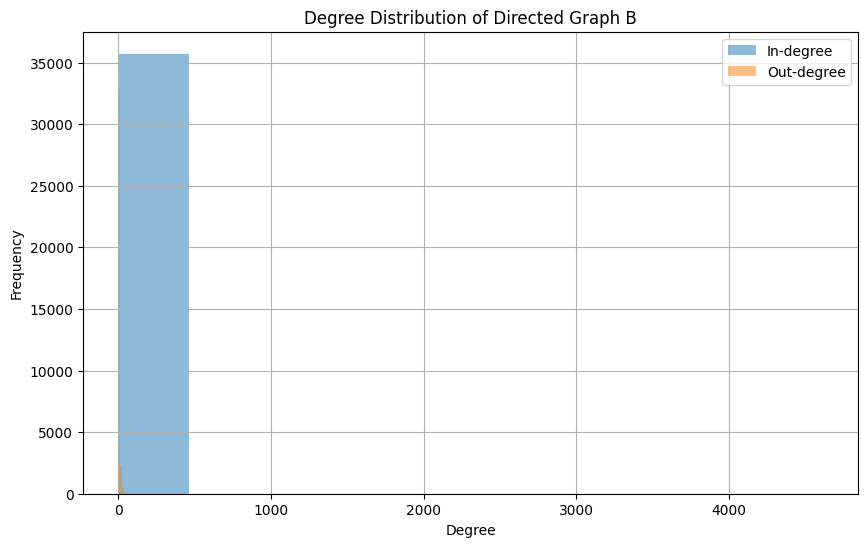

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(B.in_degree())
out_degrees = dict(B.out_degree())

# Create a list of in-degrees and out-degrees
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=10, alpha=0.5, label='In-degree')
plt.hist(out_degree_values, bins=10, alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Directed Graph B')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(B.in_degree())
out_degrees = dict(B.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(B.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Display the DataFrame
degree_df

,Node,In-degree,Out-degree
0,131073,1,2
1,131074,3,2
2,131075,5,6
3,5,238,8
4,131079,4,1
...,...,...,...
35739,262122,0,1
35740,393201,0,4
35741,393202,0,1
35742,393203,0,1


In [ ]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(G.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Display the DataFrame
degree_df

,Node,In-degree,Out-degree
0,1,16280,22
1,2,4707,77
2,3,137,25
3,4,8643,402
4,5,2194,58
...,...,...,...
456621,456622,0,2
456622,456623,0,12
456623,456624,0,1
456624,456625,0,1


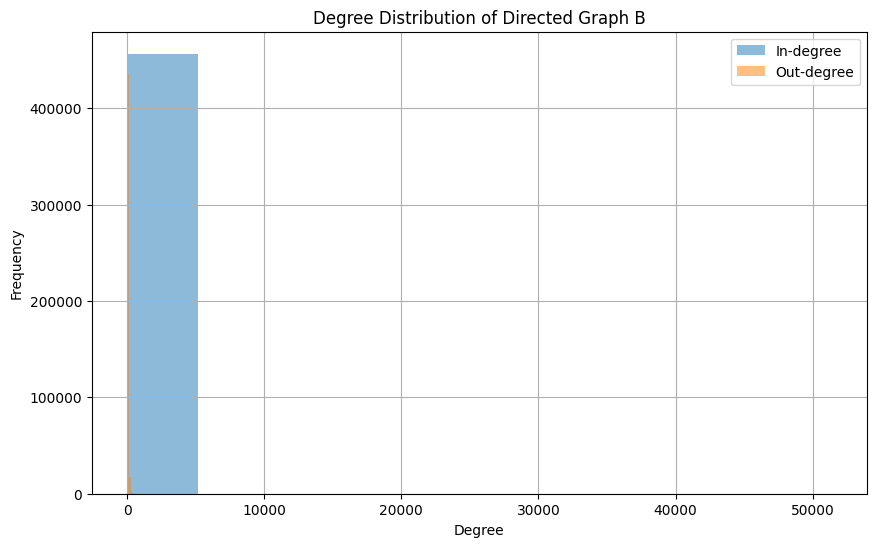

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a list of in-degrees and out-degrees
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=10, alpha=0.5, label='In-degree')
plt.hist(out_degree_values, bins=10, alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Directed Graph B')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import networkx as nx
import pandas as pd
from statistics import mode

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(B.in_degree())
out_degrees = dict(B.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(B.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Calculate the mean of in-degree and out-degree
mean_in_degree = degree_df['In-degree'].mean()
mean_out_degree = degree_df['Out-degree'].mean()

# Calculate the mode of in-degree and out-degree
mode_in_degree = mode(degree_df['In-degree'])
mode_out_degree = mode(degree_df['Out-degree'])

print("Mean In-degree:", mean_in_degree)
print("Mean Out-degree:", mean_out_degree)
print("Mode In-degree:", mode_in_degree)
print("Mode Out-degree:", mode_out_degree)


Mean In-degree: 4.6808974932855865
Mean Out-degree: 4.6808974932855865
Mode In-degree: 0
Mode Out-degree: 1


In [ ]:
import networkx as nx
import pandas as pd
from statistics import mode

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(G.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Calculate the mean of in-degree and out-degree
mean_in_degree = degree_df['In-degree'].mean()
mean_out_degree = degree_df['Out-degree'].mean()

# Calculate the mode of in-degree and out-degree
mode_in_degree = mode(degree_df['In-degree'])
mode_out_degree = mode(degree_df['Out-degree'])

print("Mean In-degree:", mean_in_degree)
print("Mean Out-degree:", mean_out_degree)
print("Mode In-degree:", mode_in_degree)
print("Mode Out-degree:", mode_out_degree)


Mean In-degree: 32.53393805871764
Mean Out-degree: 32.53393805871764
Mode In-degree: 0
Mode Out-degree: 1


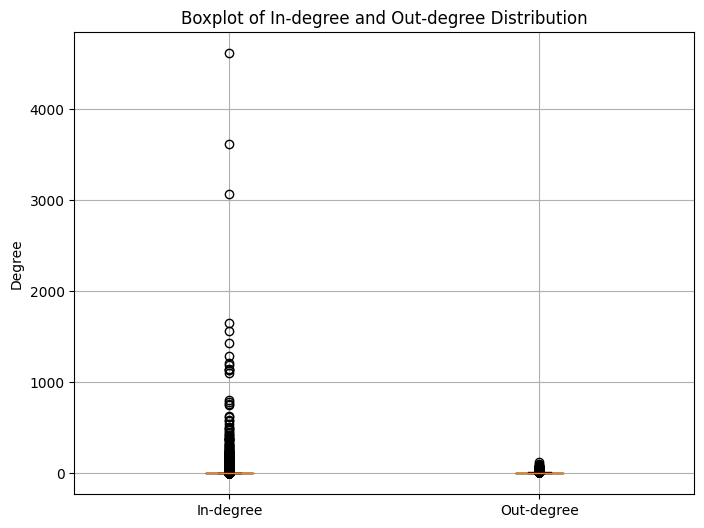

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(B.in_degree())
out_degrees = dict(B.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(B.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Draw the boxplot for in-degree and out-degree
plt.figure(figsize=(8, 6))
plt.boxplot([degree_df['In-degree'], degree_df['Out-degree']], labels=['In-degree', 'Out-degree'])
plt.title('Boxplot of In-degree and Out-degree Distribution')
plt.ylabel('Degree')
plt.grid(True)
plt.show()


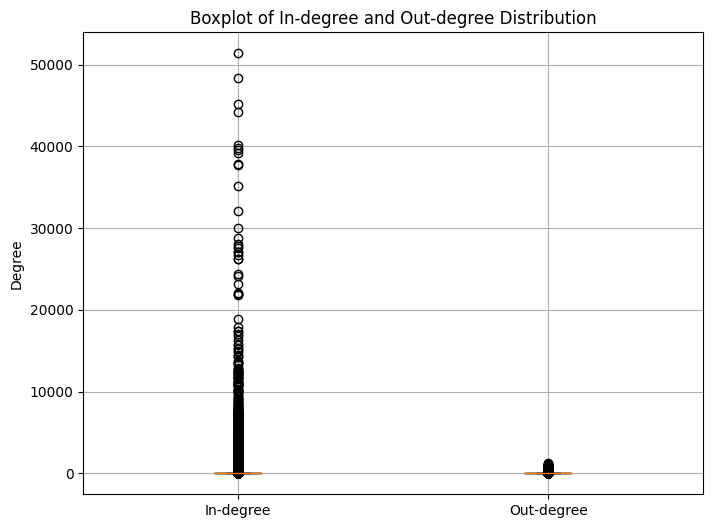

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(G.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Draw the boxplot for in-degree and out-degree
plt.figure(figsize=(8, 6))
plt.boxplot([degree_df['In-degree'], degree_df['Out-degree']], labels=['In-degree', 'Out-degree'])
plt.title('Boxplot of In-degree and Out-degree Distribution')
plt.ylabel('Degree')
plt.grid(True)
plt.show()


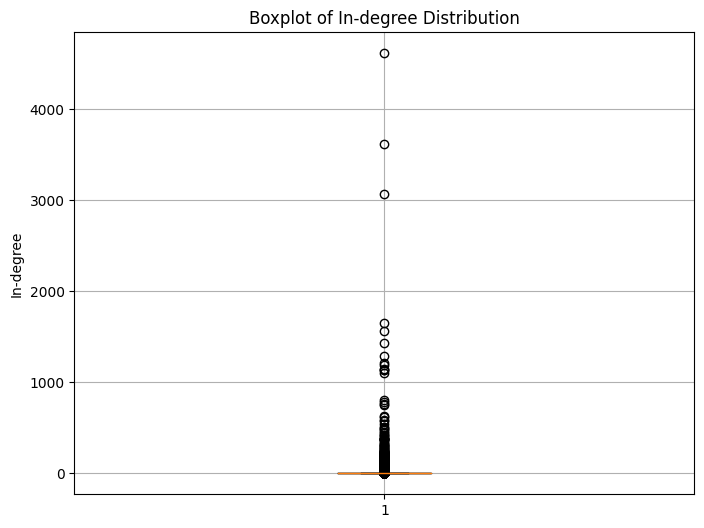

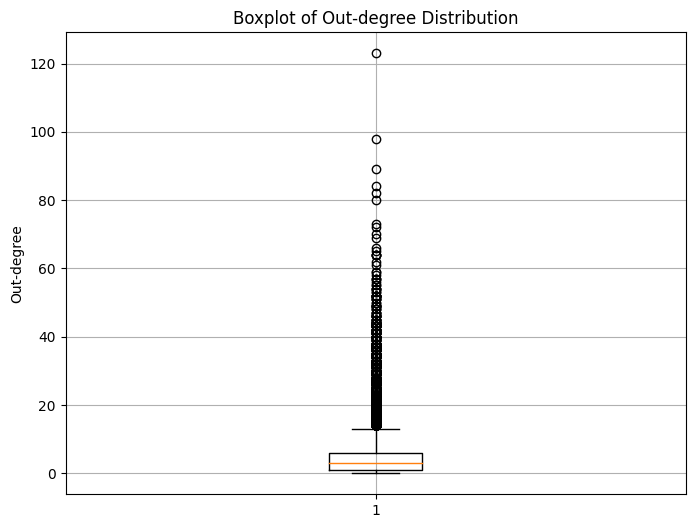

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(B.in_degree())
out_degrees = dict(B.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(B.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Draw the boxplot for in-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['In-degree'])
plt.title('Boxplot of In-degree Distribution')
plt.ylabel('In-degree')
plt.grid(True)
plt.show()

# Draw the boxplot for out-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['Out-degree'])
plt.title('Boxplot of Out-degree Distribution')
plt.ylabel('Out-degree')
plt.grid(True)
plt.show()


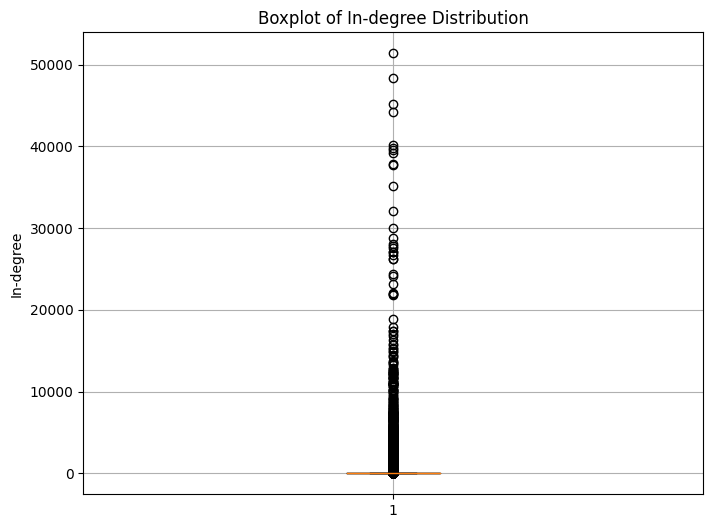

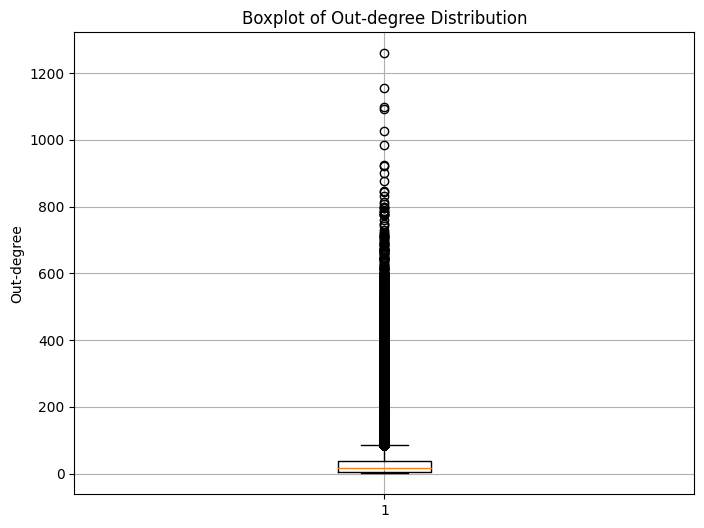

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(G.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Draw the boxplot for in-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['In-degree'])
plt.title('Boxplot of In-degree Distribution')
plt.ylabel('In-degree')
plt.grid(True)
plt.show()

# Draw the boxplot for out-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['Out-degree'])
plt.title('Boxplot of Out-degree Distribution')
plt.ylabel('Out-degree')
plt.grid(True)
plt.show()


In [ ]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Create a list to store the edges
edges_list = []

# Iterate through the edges and add them to the list
for edge in B.edges():
    edges_list.append({'ID1': edge[0], 'ID2': edge[1]})

# Create a DataFrame from the list of edges
edges_df = pd.DataFrame(edges_list)

# Save the DataFrame to a CSV file
edges_df.to_csv('graph_edges.csv', index=False)


In [ ]:
i=0
C = sorted(nx.strongly_connected_components(B), key=len, reverse=True)
for component in C:
  print(len(component))
  i=i+1
  if len(component)<5:
    break
print(i)

In [66]:
import networkx as nx
import random

def forest_fire(graph, p, q, size_ratio):
    # Initialize a new graph for the scaled-down version
    scaled_graph = nx.DiGraph()

    # Randomly select a starting node
    start_node = random.choice(list(graph.nodes()))

    # Perform the Forest Fire algorithm to grow the scaled-down graph
    visited = set()
    queue = [start_node]

    while len(scaled_graph) / len(graph) < size_ratio and queue:
        current_node = queue.pop(0)
        visited.add(current_node)

        neighbors = list(graph.neighbors(current_node))
        random.shuffle(neighbors)

        for neighbor in neighbors:
            if neighbor not in visited and neighbor not in queue:
                scaled_graph.add_edge(current_node, neighbor)
                queue.append(neighbor)
                if random.random() <= p:
                    scaled_graph.add_edge(current_node, neighbor)
                if random.random() <= q:
                    queue.append(neighbor)

    return scaled_graph

# Assuming you have already defined graph G
# Adjust p and q values as desired (0.25 and 0.1 are just examples)
p = 0.25
q = 0.1
size_ratio = 0.003

# Scale down graph G using the Forest Fire algorithm
scaled_graph = forest_fire(G, p, q, size_ratio)


In [67]:
len(scaled_graph.nodes())

1470

In [68]:
len(scaled_graph.edges())

1469

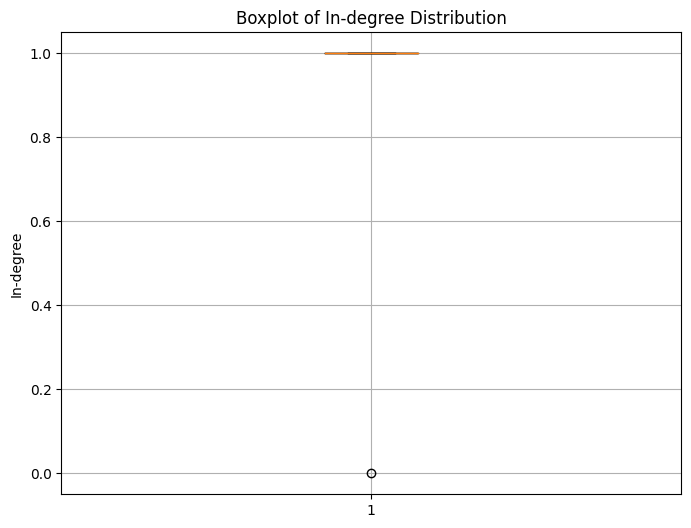

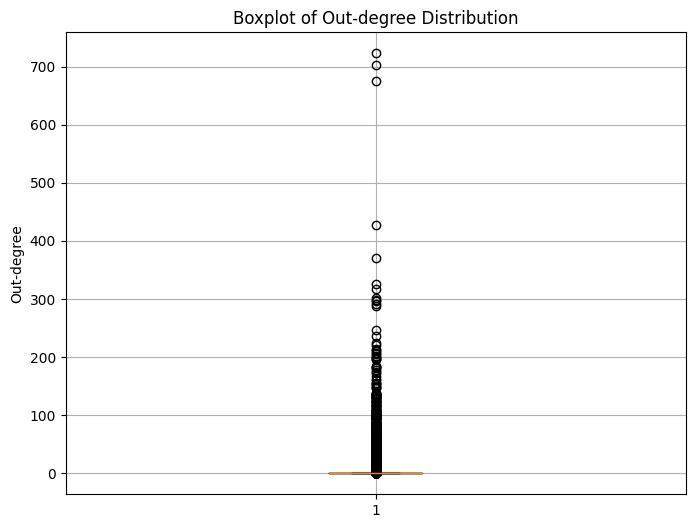

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the directed graph B

# Calculate the in-degree and out-degree of each node
in_degrees = dict(scaled_graph.in_degree())
out_degrees = dict(scaled_graph.out_degree())

# Create a DataFrame to store the degree distribution
degree_df = pd.DataFrame({'Node': list(scaled_graph.nodes()),
                          'In-degree': list(in_degrees.values()),
                          'Out-degree': list(out_degrees.values())})

# Draw the boxplot for in-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['In-degree'])
plt.title('Boxplot of In-degree Distribution')
plt.ylabel('In-degree')
plt.grid(True)
plt.show()

# Draw the boxplot for out-degree
plt.figure(figsize=(8, 6))
plt.boxplot(degree_df['Out-degree'])
plt.title('Boxplot of Out-degree Distribution')
plt.ylabel('Out-degree')
plt.grid(True)
plt.show()


In [ ]:
subgraph_nodes = set(scaled_graph.nodes())

subgraph = G.subgraph(subgraph_nodes)


In [ ]:
len(subgraph.nodes())

45756

In [ ]:
len(subgraph.edges())

2931409

In [ ]:
Subgraph = nx.DiGraph()

# Add nodes and edges from the existing sample_graph
Subgraph.add_nodes_from(subgraph.nodes())
Subgraph.add_edges_from(subgraph.edges())


In [ ]:
import networkx as nx
import pandas as pd

# Assuming you have already defined the directed graph B

# Create a list to store the edges
edges_list = []

# Iterate through the edges and add them to the list
for edge in Subgraph.edges():
    edges_list.append({'ID1': edge[0], 'ID2': edge[1]})

# Create a DataFrame from the list of edges
edges_df = pd.DataFrame(edges_list)

# Save the DataFrame to a CSV file
edges_df.to_csv('Subgraph.csv', index=False)


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Define column names

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Display the DataFrame
DF.head()

,ID1,ID2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/higgs-activity_time.txt'

# Define column names
columns = ['id1', 'id2', 'timestamp', 'action']

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display the DataFrame
df.head()

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
2,376989,50329,1341101181,RT
3,26375,168366,1341101183,MT
4,376989,13813,1341101192,RT


In [ ]:
import pandas as pd

# Assuming you have already defined Df and df

# Find all unique IDs in Df (ID1 + ID2 set)
unique_ids_set = set(DF['ID1']).union(set(DF['ID2']))

# Filter df to keep only records with valid IDs in id1 or id2
df_filtered = df[df['id1'].isin(unique_ids_set) & df['id2'].isin(unique_ids_set)]

# Display the filtered DataFrame
df_filtered

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
7,99258,50329,1341101263,RT
12,75083,84647,1341101732,RT
13,75083,42182,1341101732,MT
...,...,...,...,...
563055,85314,85314,1341705426,MT
563058,9021,80429,1341705452,MT
563059,9021,80429,1341705452,RE
563065,19979,49694,1341705552,MT


In [ ]:
len(unique_ids_set)

45756

In [ ]:
df=df_filtered

In [ ]:
# Function to print a dictionary up to a specified number of records
def print_dictionary(dictionary, limit=100):
    print("{")
    count = 0
    for key, value in dictionary.items():
        if count >= limit:
            break
        print(f"    {key}: {value}")
        count += 1
    print("}")


In [ ]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
MT_dict = {}
RT_dict = {}
RE_dict = {}
merged_dict = {}
total_dict = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in MT_dict:
            MT_dict[key] = []

        # Append the value to the list
        MT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]

        merged_dict[key].append(f"MT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RT_dict:
            RT_dict[key] = []

        # Append the value to the list
        RT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RE':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RE_dict:
            RE_dict[key] = []

        # Append the value to the list
        RE_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RE-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged_dict, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total_dict, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    213163: ['MT-223789', 'RE-223789', 'MT-213163', 'MT-246023', 'RE-246023', 'MT-213163']
    50329: ['RT-99258', 'RT-56426', 'RT-153793', 'RT-184805', 'RT-832', 'RT-30184', 'RT-832', 'RT-56426', 'RT-84647', 'RT-36417', 'MT-50191', 'MT-832', 'MT-26129', 'MT-9952']
    84647: ['RT-75083', 'MT-3604', 'RT-3933', 'MT-68939', 'MT-64367', 'RT-42180', 'MT-44086', 'RT-3604', 'RT-22814', 'MT-22814', 'MT-11953', 'RT-11953', 'MT-6793', 'MT-11953', 'RT-88838']
    42182: ['MT-75083', 'MT-89805', 'RT-6072', 'RT-103447', 'MT-89805', 'MT-89805', 'MT-89805', 'MT-6072', 'RE-6072', 'RT-6072', 'RT-56968', 'MT-89805', 'RT-39885', 'RT-35604', 'MT-92274', 'MT-92274', 'RT-25661', 'MT-89805', 'MT-42182', 'RT-6072', 'MT-42172', 'RT-116270', 'MT-89805', 'MT-11991', 'MT-56968', 'MT-6072', 'RE-6072', 'RT-96198', 'MT-1276', 'RT-4182', 'RT-86501', 'RT-136057', 'RT-44086', 'MT-2373', 'MT-89805', 'RT-65926', 'RT-31022', 'RT-35604', 'RT-175264', 'MT-2527', 'RT-39885', 'MT-6361

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Assuming you have already created the merged_dict
# Convert the merged_dict to a list of lists (transactions)
transactions = list(total_dict.values())

# Initialize the TransactionEncoder
te = TransactionEncoder()
# Fit and transform the transactions using the TransactionEncoder
te_ary = te.fit(transactions).transform(transactions)
# Convert the transformed array back to a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
441,(89805),0.014862
226,(38535),0.010857
6,(492),0.007062
171,(27705),0.006008
14,(1276),0.005481
...,...,...
667,"(3972, 163806)",0.001054
665,"(3972, 26158)",0.001054
664,"(3972, 15439)",0.001054
659,"(3547, 88838)",0.001054


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support


Mean Length of Itemsets: 1.6566265060240963
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
441,(89805),0.014862,1
226,(38535),0.010857,1
6,(492),0.007062,1
171,(27705),0.006008,1
14,(1276),0.005481,1
...,...,...,...
667,"(3972, 163806)",0.001054,2
665,"(3972, 26158)",0.001054,2
664,"(3972, 15439)",0.001054,2
659,"(3547, 88838)",0.001054,2


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,600,600
2,379,379
3,165,165
4,18,18


In [ ]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,600,600,600
2,379,379,758
3,165,165,495
4,18,18,72


In [ ]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 1925



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id1          73380
id2          73380
timestamp    73380
action       73380
dtype: int64

In [ ]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.0009, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
527,(89805),0.014862
274,(38535),0.010857
10,(492),0.007062
208,(27705),0.006008
20,(1276),0.005481
...,...,...
1267,"(90325, 69127)",0.000949
672,(179276),0.000949
666,(175276),0.000949
658,(165916),0.000949


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support


Mean Length of Itemsets: 1.8677639046538026
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
527,(89805),0.014862,1
274,(38535),0.010857,1
10,(492),0.007062,1
208,(27705),0.006008,1
20,(1276),0.005481,1
...,...,...,...
1267,"(90325, 69127)",0.000949,2
672,(179276),0.000949,1
666,(175276),0.000949,1
658,(165916),0.000949,1


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,727,727
2,613,613
3,354,354
4,64,64
5,4,4


In [ ]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,727,727,727
2,613,613,1226
3,354,354,1062
4,64,64,256
5,4,4,20


In [ ]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 3291



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.00085, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
527,(89805),0.014862
274,(38535),0.010857
10,(492),0.007062
208,(27705),0.006008
20,(1276),0.005481
...,...,...
1267,"(90325, 69127)",0.000949
672,(179276),0.000949
666,(175276),0.000949
658,(165916),0.000949


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support


Mean Length of Itemsets: 1.8677639046538026
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
527,(89805),0.014862,1
274,(38535),0.010857,1
10,(492),0.007062,1
208,(27705),0.006008,1
20,(1276),0.005481,1
...,...,...,...
1267,"(90325, 69127)",0.000949,2
672,(179276),0.000949,1
666,(175276),0.000949,1
658,(165916),0.000949,1


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,727,727
2,613,613
3,354,354
4,64,64
5,4,4


In [ ]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,727,727,727
2,613,613,1226
3,354,354,1062
4,64,64,256
5,4,4,20


In [ ]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 3291



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
